# Performance and Selection Comparison (Free Exploration, Free Exploration with Training and Strategic)

[Final Performance per task (Testing phase or last trials)](#A1)

[Average General and Final Performance](#A2)

[Average task Selection](#A3)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import pandas as pd
import warnings

from scipy.stats import beta

from ipywidgets import widgets
from IPython.html.widgets import *

warnings.filterwarnings('ignore')
rcParams.update({'font.size': 15})
#plt.style.use('ggplot')
#plt.style.use('seaborn-dark-palette')
plt.style.use('fivethirtyeight')

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
np.set_printoptions(precision=2)

import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
execute_notebook("Preprocessing.ipynb")

['free']
250
['free', 'train']
['free', 'test', 'train']


In [4]:
tasks = 4
catLab = ['1D', 'I1D', '2D', 'R']

usersF = np.shape(np.unique(csvIntF[:,0]))[0]
# For free exploration with Training
usersFT = np.shape(np.unique(csvIntFT[:,0]))[0]
usersFTI = np.shape(np.unique(informed[:,0]))[0]
usersFTU = usersFT-usersFTI
# For strategic learning
usersS = np.shape(np.unique(csvIntS[:,0]))[0]
usersSI = np.shape(np.unique(informedSE[:,0]))[0]
usersSU = usersS-usersSI

#### Load combined data

In [5]:
execute_notebook("Preprocessing-Stack Data.ipynb")

Free Exploration - general metrics loaded
Free Exploration with Training - general metrics loaded
Strategic Learning - general metrics loaded


#### Split by information (free exp with training)

In [6]:
# Split by users that received information about the existence of a random task and those that didn't
informedFT = freeT[freeT[:,1]==0]
uninformedFT = freeT[freeT[:,1]==1]
# Remove column 
freeT = np.delete(freeT, 1, axis=1)
informedFT = np.delete(informedFT, 1, axis=1)
uninformedFT = np.delete(uninformedFT, 1, axis=1)
free = np.delete(free, 1, axis=1)

#### Split by information (strategic learning)

In [7]:
# Split by users that received information about the existence of a random task and those that didn't
informedS = stra[stra[:,1]==0]
uninformedS = stra[stra[:,1]==1]
# Remove column (condition)
stra = np.delete(stra, 1, axis=1)
informedS = np.delete(informedS, 1, axis=1)
uninformedS = np.delete(uninformedS, 1, axis=1)

<a id='A1'></a>
## Final Performance 

In [11]:
# User, task category, right or wrong
#*****************
'''
splitFTFI = splitCsvFTI.copy()
splitFTFU = splitCsvFTU.copy()
splitFF = splitCsvF.copy()
'''
splitFTFI = splitCsvFTI
splitFTFU = splitCsvFTU
splitFF = splitCsvF

#### Preprocessing Strategic testing phase

In [12]:
# Get a copy for splitting by condition (below)
csvIntSTeCond = csvIntSTe.copy()

# Remove phase column (2) (and for now also the condition column (1))
csvIntSTe = np.delete(csvIntSTe, (1,2), axis=1)

# Split by user
splitCsvSTe = [csvIntSTe[csvIntSTe[:,0]==i] for i in np.unique(csvIntSTe[:,0])]

# Split by condition
csvIntSTeCond = np.delete(csvIntSTeCond, 2, axis = 1)
informedSTe = csvIntSTeCond[csvIntSTeCond[:,1]==0]
uninformedSTe = csvIntSTeCond[csvIntSTeCond[:,1]==1]
informedSTe = np.delete(informedSTe, 1, axis=1)
uninformedSTe = np.delete(uninformedSTe, 1, axis=1)
# Split also by user
splitInfSTe = [informedSTe[informedSTe[:,0]==i] for i in np.unique(informedSTe[:,0])]
splitUniSTe = [uninformedSTe[uninformedSTe[:,0]==i] for i in np.unique(uninformedSTe[:,0])]

In [13]:
# Get Percent Correct

# Check performance during test
def checkPerformanceTest(arr, usersArr):
    # Stores percentage correct per user
    pcUser = []
    # Go through every user and only extract the PC of each task
    for u in range(usersArr):
        tmpU = arr[u]
        pcTask = []
        for t in range(tasks):
            tmpT = tmpU[tmpU[:,1] == t]
            # Get PC for this task
            pcTask.append(np.sum(tmpT[:,2]==1) / np.shape(tmpT[:,2])[0])
        pcUser.append(pcTask)
    return np.asarray(pcUser)

# Go through every user and extract the last 15 attempts at each task (if possible)
def checkPerformanceFinal(arr, usersArr, getLast=15):
    # Stores percentage correct per user
    pcUser = []
    # Go through every user and only extract the PC of each task
    for u in range(usersArr):
        tmpU = arr[u]
        pcTask = []
        for t in range(tasks):
            tmpT = tmpU[tmpU[:,1] == t]
            
            if np.shape(tmpT)[0] == 0:
                pcTask.append(np.nan)
            else:
                # Get last 15
                tmpT = tmpT[-getLast:,:]
                # Get PC for this task
                pcTask.append(np.mean(tmpT[:,2]))
        pcUser.append(pcTask)
    return np.asarray(pcUser)

pcfinFTFI = np.nanmean(checkPerformanceFinal(splitFTFI, usersFTI),axis=0)
pcfinFTFU = np.nanmean(checkPerformanceFinal(splitFTFU, usersFTU),axis=0)
pcfinFF = np.nanmean(checkPerformanceFinal(splitFF, usersF),axis=0)
pcfinSI = np.mean(checkPerformanceTest(splitInfSTe, usersSI), axis=0)
pcfinSU = np.mean(checkPerformanceTest(splitUniSTe, usersSU), axis=0)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [14]:
def plotBarTasks(arrF, arrFTI, arrFTU, arrSI, arrSU, title, ylabel):
    ind = np.arange(tasks)  # the x locations for the groups
    width = 0.15       # the width of the bars
    fig, ax = plt.subplots(figsize=(12, 5))
    rects1 = ax.bar(ind, arrF, width, color='r')
    rects2 = ax.bar(ind+width, arrFTI, width, color='b')
    rects3 = ax.bar(ind+width*2, arrFTU, width, color='g')
    rects4 = ax.bar(ind+width*3, arrSI, width, color='c')
    rects5 = ax.bar(ind+width*4, arrSU, width, color='m')

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('1D', 'I1D', '2D', 'R'))
    ax.legend((rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), 
              ('Free', 'Train+Free Informed', 'Train+Free Uninformed', 'Strategic Informed', 'Strategic Uninformed'))

In [15]:
plotBarTasks(pcfinFF, pcfinFTFI, pcfinFTFU, pcfinSI, pcfinSU, 'Final performance', 'Success rate')

NameError: name 'pcfinSI' is not defined

<a id='A2'></a>
## Average General and Final performance

In [16]:
def plotBarModes(arr, title, ylabel):
    ind = np.arange(5)  # the x locations for the groups
    width = 0.35       # the width of the bars
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(ind, arr, width)
    rects1[0].set_color('r')
    rects1[1].set_color('b')
    rects1[2].set_color('g')
    rects1[3].set_color('c')
    rects1[4].set_color('m')
    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('Free', 'T+F Inf', 'T+F Uni', 'S Inf', 'S Uni'))

NameError: name 'pcfinSI' is not defined

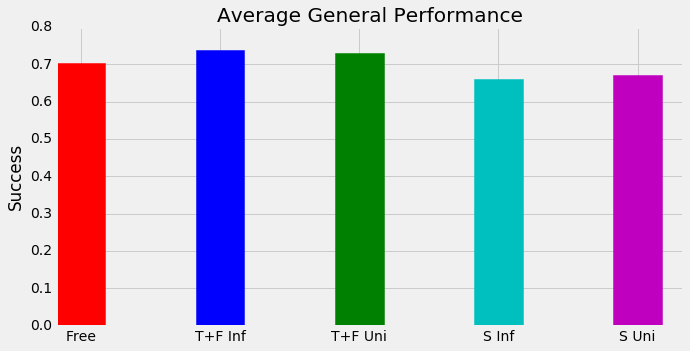

In [17]:
# During free exploration for all tasks how many successes did they get?
# Get everything during free exploration
dataFE = csvIntF.copy()
dataFTE = csvIntFT[csvIntFT[:,2]==0]
dataS = csvIntS.copy()
dataSE = dataS[dataS[:,2]==0]
# Split by condition
dataFTEI = dataFTE[dataFTE[:,1] == 0]
dataFTEU = dataFTE[dataFTE[:,1] == 1]
dataSEI = dataSE[dataSE[:,1] == 0]
dataSEU = dataSE[dataSE[:,1] == 1]

# General performance
meanGenPerf = [np.mean(dataFE[:,2]),np.mean(dataFTEI[:,4]),np.mean(dataFTEU[:,4]),np.mean(dataSEI[:,4]),np.mean(dataSEU[:,4])]
plotBarModes(meanGenPerf, 'Average General Performance', 'Success')
meanFinalPerf = [np.mean(pcfinFTFI), np.mean(pcfinFTFU), np.mean(pcfinFF), np.mean(pcfinSI), np.mean(pcfinSU)]
plotBarModes(meanFinalPerf, 'Average Final Performance', 'Success')

<a id='A3'></a>
## Average General Selection

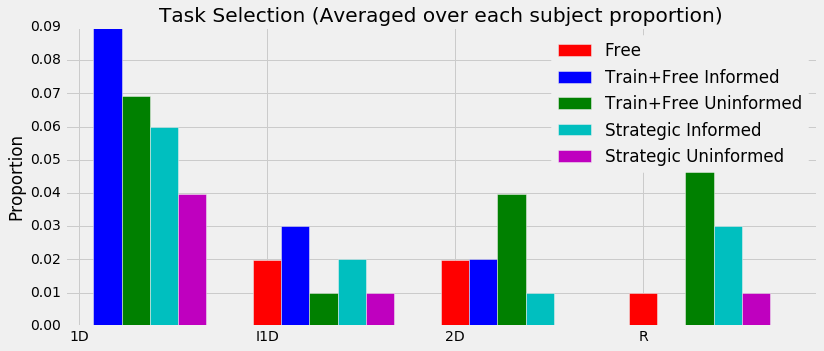

In [18]:
# CHECK GENERAL TASK SELECTION (e.g. i could have chosen task 1 as much as 250 times but i chose it 25 only so 10%)
# GLOBAL POPULATION LEVEL
def selectionGlobal(arr):
    _,counts = np.unique(arr[:,-2], return_counts=True)
    return counts/np.sum(counts)

u,cFE = np.unique(dataFE[:,-2], return_counts=True)
u,cFTEI = np.unique(dataFTEI[:,-2], return_counts=True)
u,cFTEU = np.unique(dataFTEU[:,-2], return_counts=True)
u,cSEI = np.unique(dataSEI[:,-2], return_counts=True)
u,cSEU = np.unique(dataSEU[:,-2], return_counts=True)

# AVERAGED BY PEOPLE
#print(splitCsvF)
def selectionPercent(arr, userArr):
    selUser = []
    for u in range(userArr):
        selTask = []
        for t in range(tasks):
            selTask.append(np.sum(arr[u][:,1]==t))
        selUser.append(selTask)    
    selUser = np.asarray(selUser)
    # Get proportions then get mean
    selpc = selUser/selUser.sum(axis=1)[:,None]
    mselpc = np.mean(selpc,axis=0)
    #print(selpc)
    return mselpc

selF = selectionPercent(splitCsvF, usersF)
selFTI = selectionPercent(splitCsvFTI, usersFTI)
selFTU = selectionPercent(splitCsvFTU, usersFTU)
selSI = selectionPercent(splitCsvSI, usersSI)
selSU = selectionPercent(splitCsvSU, usersSU)

plotBarTasks(selF, selFTI, selFTU, selSI, selSU, 'Task Selection (Averaged over each subject proportion)', 'Proportion')